## References
* [Echo](https://github.com/lazyprogrammer/machine_learning_examples/blob/master/cnn_class/echo.py)

* [Blur](https://github.com/lazyprogrammer/machine_learning_examples/blob/master/cnn_class/blur.py)

* [Edge](https://github.com/lazyprogrammer/machine_learning_examples/blob/master/cnn_class/edge.py)

* [Custom Blur](https://github.com/lazyprogrammer/machine_learning_examples/blob/master/cnn_class/custom_blur.py)

## Extra
* [convolve](http://stackoverflow.com/questions/20036663/understanding-numpys-convolve)

# Audio

In [50]:
import sys
import urllib
import wave
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

from IPython.display import Audio

## Original file

In [51]:
Audio('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/cnn_class/helloworld.wav')

numpy signal:  (18432,)


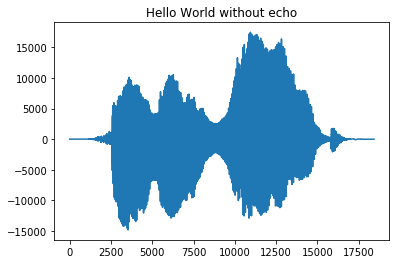

In [69]:
urllib.request.urlretrieve(
    'https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/cnn_class/helloworld.wav', 
    filename='helloworld.wav'
)
spf = wave.open('helloworld.wav', 'r')

signal = spf.readframes(-1)
signal = np.fromstring(signal, dtype=np.int16)
print('numpy signal: ', signal.shape)

Audio('../datasets/cnn_examples/helloworld.wav')
plt.plot(signal)
plt.title('Hello World without echo')
plt.show()

## Convolution with an Impulse response

In [70]:
delta = np.array([1.0, 0.0, 0.0])
noecho = np.convolve(signal, delta).astype(np.int16)
print('noecho signal: ', noecho.shape)
assert(np.abs(noecho[:len(signal)] - signal).sum() < 0.000001)

write('noecho.wav', 16000, noecho)

noecho signal:  (18434,)


In [71]:
Audio('noecho.wav')

## Adding some echo

In [72]:
filt = np.zeros(16000) # 16,000 samples long is one second
# 'repeat' sample ever quarter of a second
filt[0] = 1
filt[4000] = 0.6
filt[8000] = 0.3
filt[12000] = 0.2
filt[15999] = 0.1
out = np.convolve(signal, filt).astype(np.int16)

write('out.wav', 16000, out)

In [73]:
Audio('out.wav')

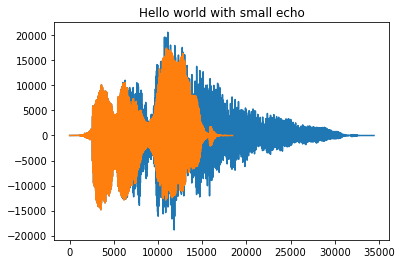

In [74]:
plt.plot(out)
plt.plot(signal)
plt.title("Hello world with small echo")
plt.show()

# Image

In [76]:
from scipy.signal import convolve2d
import matplotlib.image as mpimg

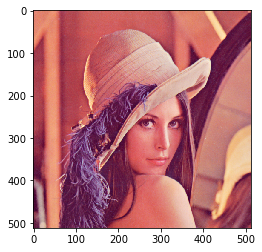

In [84]:
urllib.request.urlretrieve(
    'https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/cnn_class/lena.png',
    filename='lena.png'
)
img = mpimg.imread('lena.png')
# Return value is a numpy.array. For grayscale images, the return array is MxN. 
# For RGB images, the return value is MxNx3. For RGBA images the return value is MxNx4.
plt.imshow(img)
plt.show()

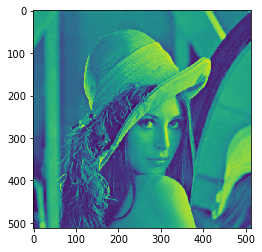

In [91]:
bw = img.mean(axis=2)
plt.imshow(bw)
plt.show()

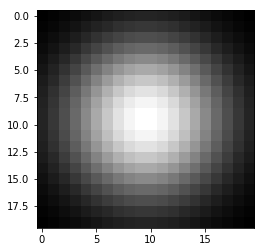

In [92]:
# create a gaussian filter
W = np.zeros((20, 20))
for i in range(20):
    for j in range(20):
        # square distance from center
        dist = (i-9.5)**2 + (j-9.5)**2
        W[i,j] = np.exp(-dist/50.)

plt.imshow(W, cmap='gray')
plt.show()

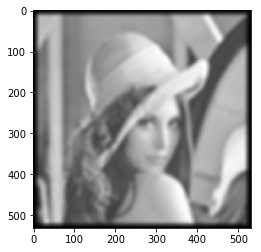

In [99]:
out = convolve2d(bw, W)
plt.imshow(out, cmap='gray')
plt.show()

In [100]:
# After convolution the output signal is N + M - 1
# N - size of signal, M size of filter
print(out.shape)

(531, 531)


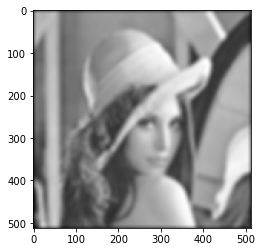

(512, 512)


In [101]:
out = convolve2d(bw, W, mode='same')
plt.imshow(out, cmap='gray')
plt.show()
print(out.shape)

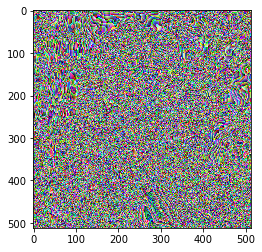

In [103]:
# same filter on all 3 color channels
out3 = np.zeros(img.shape)
for i in range(3):
    out3[:, :, i] = convolve2d(img[:, :, i], W, mode='same')
plt.imshow(out3)
plt.show()

# Edge Detection

In [104]:
# Sobel operator - approximate gradient in X dir
Hx = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1],
], dtype=np.float32)

# Sobel operator - approximate gradient in Y dir
# transpose of Hx
Hy = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1],
], dtype=np.float32)

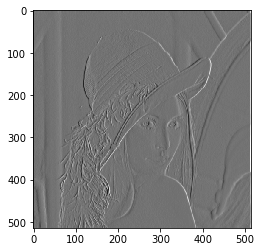

In [105]:
# Detect horizontal edges
Gx = convolve2d(bw, Hx)
plt.imshow(Gx, cmap='gray')
plt.show()

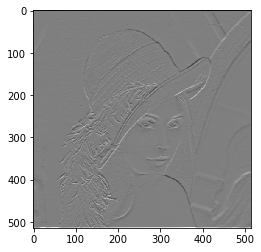

In [106]:
# Detect vertical edges
Gy = convolve2d(bw, Hy)
plt.imshow(Gy, cmap='gray')
plt.show()

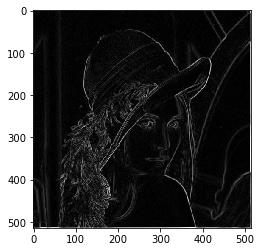

In [111]:
# Because these are vectors.. let's do the following

# Gradient magnitude
G = np.sqrt(Gx*Gx + Gy*Gy)
plt.imshow(G, cmap='gray')
plt.show()

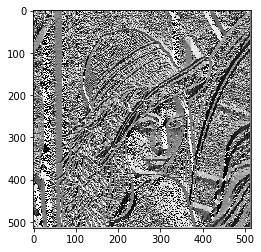

In [112]:
# The gradient's direction
theta = np.arctan2(Gy, Gx)
plt.imshow(theta, cmap='gray')
plt.show()

# Do convolution in a neural network and use gradient descent to find the best filter!

# Custom convolution

In [ ]:
def convolve2d(X, W): # takes around 6 minutes
    n1, n2 = X.shape
    m1, m2 = W.shape
    Y = np.zeros((n1+m1-1, n2+m2-1))
    for i in range(n1+m1-1):
        for ii in range(m1):
            for j in range(n2+m2-1):
                for jj in range(m2):
                    if i>=ii and j>=jj and i-ii<n1 and j-jj<n2:
                        Y[i,j] += W[ii,jj] * X[i-ii, j-jj]
    return Y

def convolve2d(X, W): # takes about 2 seconds
    n1, n2 = X.shape
    m1, m2 = W.shape
    Y = np.zeros((n1+m1-1, n2+m2-1))
    for i in range(n1):
        for j in range(n2):
            Y[i:i+m1,j:j+m2] += X[i,j]*W
    return Y

def convolve2d(X, W): # same size as input
    n1, n2 = X.shape
    m1, m2 = W.shape
    Y = np.zeros((n1+m1-1, n2+m2-1))
    for i in range(n1):
        for j in range(n2):
            Y[i:i+m1,j:j+m2] += X[i,j]*W
    ret = Y[m1/2:-m1/2+1, m2/2:-m2/2+1]
    assert(ret.shape == X.shape)
    return ret